# Introduction

   Banks offer a variety of products and services to diversify their sources of revenue. Banks are able to generate rich and significant data through a variety of methods: bank visits, applications and customer support calls. One of the main products that banks are eager to push are personal loan because of their high short term returns compared to other products they offer. That is why this project aims at helping the marketing department of my current employer (bank) to target the right segment of the bank's existing customer base. Thus, I am making recommendations based on the bank's customers' debt to income ratio. To do so, I analysed our customers' database based on age and level of education. Such recommendations will render the marketing campaign efficient and insightful.

   After running a descriptive statistical analysis of the data, we conclude that the population mean is around 35. However, most of our customers fall on the youth cathegory, those who are under 35.

              Age         Edu
count  850.000000  850.000000
mean    35.029412    1.710588
std      8.041432    0.927784
min     20.000000    1.000000
25%     29.000000    1.000000
50%     34.000000    1.000000
75%     41.000000    2.000000
max     56.000000    5.000000


(array([ 79., 348., 175., 121., 127.]),
 array([20, 25, 35, 40, 45, 56]),
 <BarContainer object of 5 artists>)

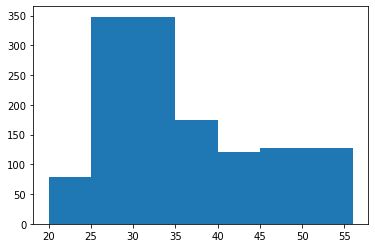

In [1]:
import pandas as pd
df = pd.read_excel (r'C:\Users\Faical\Downloads\CapSto3\Cust_Segmentation.xlsx')
print (df[['Age', 'Edu']].describe())

import numpy as np
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=[20, 25, 35, 40, 45, 56])

# Hypothesis

From a preliminary observation, I deduced that customers over the age of 40 seem to have a lower debt to income ratio compared to their younger counterparts. That might be due to many factors, some of which are not possible to measure; like experience and responsibility. Fortunately, we can use statistical tests to compare these segments and find correlations and differences that help us determine if we are right to assume that seniors should be the ones to target with the marketing campaign.

# Youth vs Seniors

In [14]:
from scipy import stats
youth = df.iloc[(df['Age'] < 35).values]
senior = df.iloc[(df['Age'] >= 35).values]

stats.ttest_ind(youth['DebtIncomeRatio'], senior['DebtIncomeRatio'])

Ttest_indResult(statistic=0.328491361348362, pvalue=0.7426212728574344)

In [4]:
import math
def get_95_ci(array_1, array_2):
    youth_sample_size = array_1.shape[0]
    senior_sample_size = array_2.shape[0]
    youth_mean = array_1.mean()
    senior_mean = array_2.mean()
    youth_var = array_1.var()
    senior_var = array_2.var()
    std_err_difference = math.sqrt((youth_var/youth_sample_size)+(senior_var/senior_sample_size))
    mean_difference = senior_mean - youth_mean
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


get_95_ci(youth['DebtIncomeRatio'], senior['DebtIncomeRatio'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.9815308228665274 and 0.8261701505194445.'

or as the below error bars indicate:

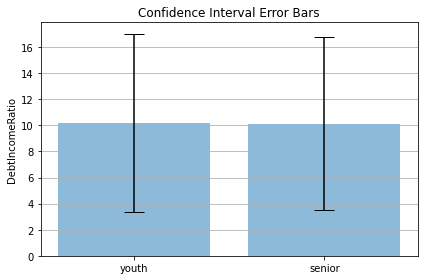

In [12]:
import numpy as np
import matplotlib.pyplot as plt

youth_mean = np.mean(youth['DebtIncomeRatio'])
senior_mean = np.mean(senior['DebtIncomeRatio'])
youth_std = np.std(youth['DebtIncomeRatio'])
senior_std = np.std(senior['DebtIncomeRatio'])
Age_pop = ['youth', 'senior']
x_pos = np.arange(len(Age_pop))
Age_mean = [youth_mean, senior_mean]
error = [youth_std, senior_std]

#confidence interval error bars
fig, ax = plt.subplots()
ax.bar(x_pos, Age_mean, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('DebtIncomeRatio')
ax.set_xticks(x_pos)
ax.set_xticklabels(Age_pop)
ax.set_title('Confidence Interval Error Bars')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

The small spread between both segments in the graph below is a testament of the accuracy of the population sample

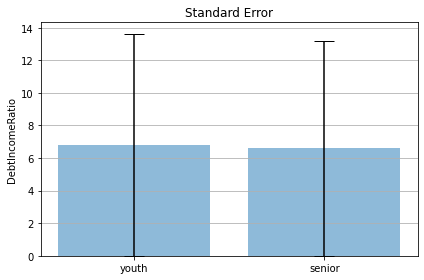

In [13]:
#standard error
fig, ax = plt.subplots()
ax.bar(x_pos, error, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('DebtIncomeRatio')
ax.set_xticks(x_pos)
ax.set_xticklabels(Age_pop)
ax.set_title('Standard Error')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

The below test show that both columns of data are dependent on one another because there is a linear relationship between the two

In [21]:
df['Age'].corr(df['DebtIncomeRatio'])

0.008240009437843556

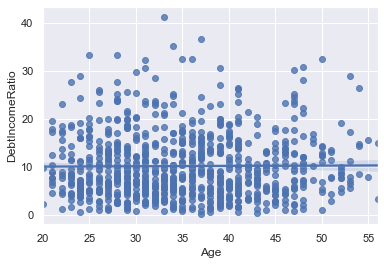

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

sns.regplot(x="Age", y="DebtIncomeRatio", data=df);

# Educational Level

As I mentioned previously, the difference in the educational level among our customers might shed a light on how they behave financially. Thus, we will contrast our population sample's educational level with their debt to income ratio to see how significant of an index the educational level is to us in determining who the marketing campaign should target and eventually offer a personal loan to. The educational level are refered to numerically as follow (1 = highschool, 2 = some college, 3 = college grad, 4 = Masters, 5 = PhDs).
I believe that the higher the education, the lower the debt to income is. To prove (or disprove) this hypothesis, I chose to repeat the same method I used to approach the age segments.

In [16]:
from scipy import stats
highschool = df.iloc[(df['Edu'] == 1).values]
college = df.iloc[(df['Edu'] != 1).values]

stats.ttest_ind(youth['DebtIncomeRatio'], senior['DebtIncomeRatio'])

Ttest_indResult(statistic=0.328491361348362, pvalue=0.7426212728574344)

In [18]:
import math
def get_95_ci(array_1, array_2):
    hs_sample_size = array_1.shape[0]
    college_sample_size = array_2.shape[0]
    hs_mean = array_1.mean()
    college_mean = array_2.mean()
    hs_var = array_1.var()
    college_var = array_2.var()
    std_err_difference = math.sqrt((hs_var/hs_sample_size)+(college_var/college_sample_size))
    mean_difference = college_mean - hs_mean
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


get_95_ci(highschool['DebtIncomeRatio'], college['DebtIncomeRatio'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.9888191736352527 and 0.8206920833342433.'

The above test results closeness to the mean and distance from 0 show that the dataset is accurate and also a high confidence interval as the graph below shows

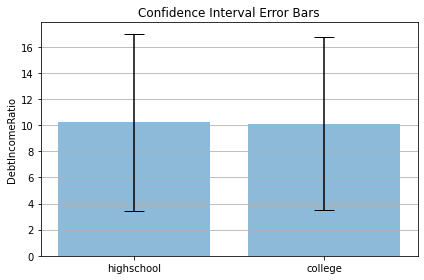

In [19]:
import numpy as np
import matplotlib.pyplot as plt

hs_mean = np.mean(highschool['DebtIncomeRatio'])
college_mean = np.mean(college['DebtIncomeRatio'])
hs_std = np.std(highschool['DebtIncomeRatio'])
college_std = np.std(college['DebtIncomeRatio'])
edu_pop = ['highschool', 'college']
x_pos = np.arange(len(edu_pop))
edu_mean = [hs_mean, college_mean]
error = [hs_std, college_std]

#confidence interval error bars
fig, ax = plt.subplots()
ax.bar(x_pos, edu_mean, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('DebtIncomeRatio')
ax.set_xticks(x_pos)
ax.set_xticklabels(edu_pop)
ax.set_title('Confidence Interval Error Bars')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

The closeness of both samples shows the dataset accuarcy

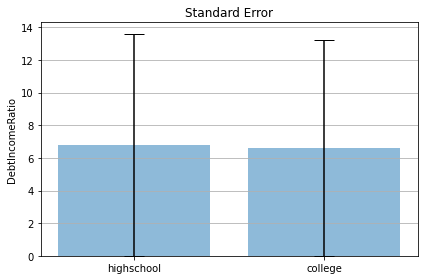

In [20]:
#standard error
fig, ax = plt.subplots()
ax.bar(x_pos, error, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('DebtIncomeRatio')
ax.set_xticks(x_pos)
ax.set_xticklabels(edu_pop)
ax.set_title('Standard Error')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

The below pearson correlation test shows an interdependent linear relationship

In [28]:
df['Edu'].corr(df['DebtIncomeRatio'])

0.008053385963365368

# Conclusion and Recommendations

To conclude, customers who are 40 and older tend to have their debt under control more than their younger counterparts. From this deduction, they seem to be the portion of the population to target directly with a marketing campaign. However, the educational level play an important role in indicating the likelihood of the target customer repaying a short term loan like personal loans.
I personally recommend that we consider the age of the potential personal loan purchaser while considering the educational level so that we do not end up losing a segment of our customers who might be younger but display a great deal of financial responsibility through a low debt to income ratio.